In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('/content/crime_data.csv')

In [6]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### **EDA**

In [7]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
data.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [9]:
#first column name was not correct so we need to rename that name
data=data.rename({'Unnamed: 0':'Country'},axis=1)

In [10]:
data

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [11]:
data1=data.copy()

In [12]:
data2=data.copy()

In [13]:
#checking null values
data.isna().sum()

Country     0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [14]:
#checking duplicated values
data.duplicated().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [16]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## **1. Hierarchical Clustering**

In [17]:
data_h=data

In [18]:
data_hm=data_h.iloc[:,1:]

In [19]:
#for every clustering models we need to scale the data,For hierarchical clustering am using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
data_hm.iloc[:,:]=mm.fit_transform(data_hm.iloc[:,:])

In [20]:
data_hm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


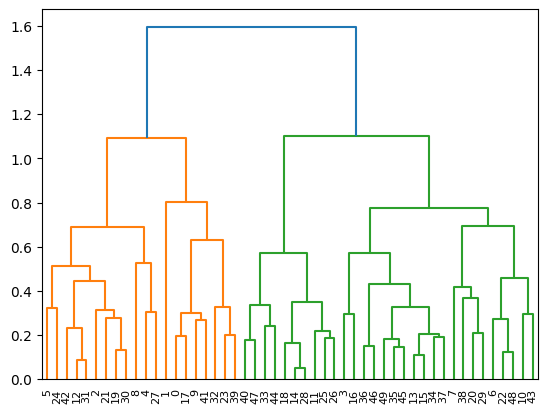

In [21]:
#creating dendogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(data_hm,method='complete'))
plt.show()

In [22]:
#creating clusters
from sklearn.cluster import AgglomerativeClustering

In [23]:
he=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [24]:
he.fit(data_hm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [25]:
yhe=he.fit_predict(data_hm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
yhe

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [27]:
yhe.shape

(50,)

In [28]:
data_h['Clusters']=yhe

In [29]:
data_h

,Country,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [30]:
data_final=data_h.sort_values('Clusters')

In [31]:
data_final.head()

,Country,Murder,Assault,UrbanPop,Rape,Clusters
49,Wyoming,6.8,161,60,15.6,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
16,Kentucky,9.7,109,52,16.3,0
15,Kansas,6.0,115,66,18.0,0


In [32]:
data_final['Clusters'].value_counts()

0    20
1    12
2    10
3     7
4     1
Name: Clusters, dtype: int64

In [33]:
data_cls=data_final.iloc[:,[0,-1]]

In [34]:
data_cls

,Country,Clusters
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


### **2. Kmean Clustering**

In [35]:
#we have already done EDA on the data and stored that data as data so we are not doing EDA but we are just using that data for Kmean Clustering
data_k=data

In [36]:
data_ks=data_k.iloc[:,1:]

In [37]:
#standaridizing numerical data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_ks.iloc[:,:]=sc.fit_transform(data_ks)

In [38]:
data_ks

,Murder,Assault,UrbanPop,Rape,Clusters
0,1.255179,0.790787,-0.526195,-0.003451,1.618677
1,0.513019,1.118060,-1.224067,2.509424,2.488933
2,0.072361,1.493817,1.009122,1.053466,-0.121836
3,0.234708,0.233212,-1.084492,-0.186794,-0.992092
4,0.281093,1.275635,1.776781,2.088814,-0.121836
5,0.025976,0.402909,0.869548,1.883901,-0.121836
6,-1.040880,-0.736484,0.799761,-1.092723,-0.992092
7,-0.437875,0.815030,0.450825,-0.585834,-0.992092
8,1.765415,1.990786,1.009122,1.150530,-0.121836
9,2.229265,0.487757,-0.386621,0.492653,1.618677


In [39]:
#For kmean clustering we need to import the Kmean Library that is presented in the Sklearn Library
from sklearn.cluster import KMeans

In [40]:
#inertia calculates the within cluster sum of squares for clusters from 1 to 11
wcss=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i)
  kmean.fit(data_ks)
  wcss.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [41]:
wcss

[250.0,
 142.2356915237204,
 98.66687275954956,
 61.85088338209116,
 52.896885907129885,
 45.723851469378175,
 40.62383416435283,
 36.86423969477175,
 34.20251637853438,
 30.901267236318045]

<Axes: >

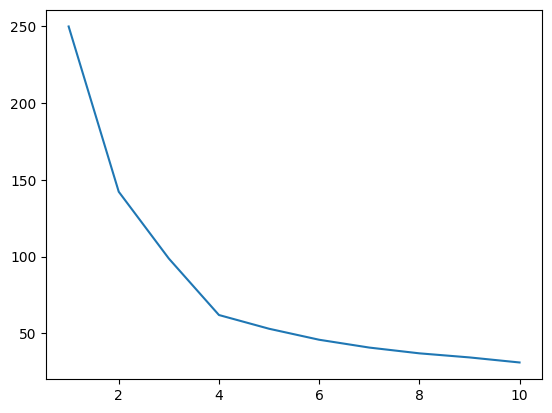

In [42]:
sns.lineplot(x=range(1,11),y=wcss)

In [43]:
#creating Kmean Clustering
kmean1=KMeans(n_clusters=4)
kmean1.fit(data_ks)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [44]:
kmean1.labels_

array([3, 3, 0, 2, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 2, 3, 1, 0, 2, 0,
       2, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 2, 2], dtype=int32)

In [45]:
#in the starting we have copied the normal data without any changes now we are using that data for Kmean
data1['Clusters']=kmean1.labels_

In [46]:
data1=data1.rename({'Clusters':'Cluster_labels'},axis=1)

In [47]:
data1.head()

,Country,Murder,Assault,UrbanPop,Rape,Cluster_labels
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [48]:
#predicting
predict=kmean1.fit_predict(data_ks)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
predict

array([2, 2, 3, 0, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 0, 2, 1, 3, 0, 3,
       0, 2, 3, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 0, 0], dtype=int32)

In [50]:
# The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
silhouette=silhouette_score(data_ks,predict)

In [52]:
silhouette

0.4528198360405088

### **DBSCAN(Density-based spatial clustering of applications with noise)**

In [55]:
#In the starting,i have completed EDA on the given data and copied the Well structured as Data2.
#The copied data am using for DBSCAN
data_d=data2

In [56]:
data_dt=data_d.copy()

In [57]:
data_d.head()

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [58]:
#doing standardizing for numerical columns.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_d.iloc[:,1:]=sc.fit_transform(data_d.iloc[:,1:])

In [59]:
data_d

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,-0.003451
1,Alaska,0.513019,1.118060,-1.224067,2.509424
2,Arizona,0.072361,1.493817,1.009122,1.053466
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794
4,California,0.281093,1.275635,1.776781,2.088814
5,Colorado,0.025976,0.402909,0.869548,1.883901
6,Connecticut,-1.040880,-0.736484,0.799761,-1.092723
7,Delaware,-0.437875,0.815030,0.450825,-0.585834
8,Florida,1.765415,1.990786,1.009122,1.150530
9,Georgia,2.229265,0.487757,-0.386621,0.492653


In [60]:
data_ds=data_d.iloc[:,1:]

In [61]:
data_ds.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [69]:
#Finding the nearest neighbors
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=2)
mm=nn.fit(data_ds)

distance,indices=mm.kneighbors(data_ds)

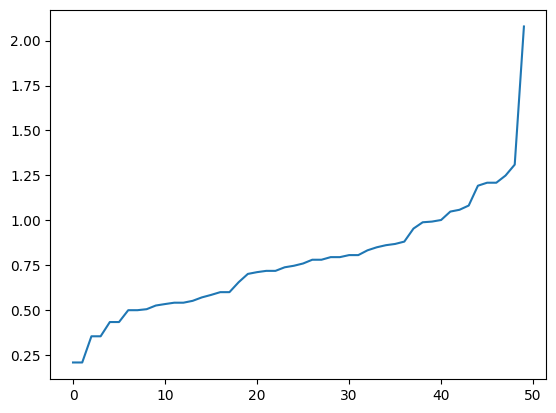

In [70]:
distance = np.sort(distance,axis=0)
distance = distance[:,1]
plt.plot(distance)

In [71]:
# The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 2.
from sklearn.cluster import DBSCAN

In [72]:
dbscan=DBSCAN(eps=2,min_samples=4)

In [73]:
dbs=dbscan.fit(data_ds)

In [74]:
dbs.fit_predict(data_ds)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [75]:
cl=pd.DataFrame(dbs.labels_,columns=['cluster'])

In [76]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [78]:
data_dt.append(cl)

<ipython-input-78-ed3d4a4f8661>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_dt.append(cl)


,Country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236.0,58.0,21.2,NaN
1,Alaska,10.0,263.0,48.0,44.5,NaN
2,Arizona,8.1,294.0,80.0,31.0,NaN
3,Arkansas,8.8,190.0,50.0,19.5,NaN
4,California,9.0,276.0,91.0,40.6,NaN
...,...,...,...,...,...,...
45,NaN,NaN,NaN,NaN,NaN,0.0
46,NaN,NaN,NaN,NaN,NaN,0.0
47,NaN,NaN,NaN,NaN,NaN,0.0
48,NaN,NaN,NaN,NaN,NaN,0.0


In [79]:
clustered=pd.concat([data_ds,cl],axis=1)

In [80]:
clustered

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,0
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,0
5,0.025976,0.402909,0.869548,1.883901,0
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,0
9,2.229265,0.487757,-0.386621,0.492653,0


In [82]:
clustered[clustered['cluster']==-1]

,Murder,Assault,UrbanPop,Rape,cluster
1,0.513019,1.11806,-1.224067,2.509424,-1


In [83]:
clustered['cluster'].value_counts()

 0    49
-1     1
Name: cluster, dtype: int64